# Campaña "Seguro Vivienda" de compañía financiera

Los correos a todos los potenciales clientes de un producto no son una estrategia de marketing efectiva, ya que muchos de ellos no están interesados. Identificando a los más propensos a contratar el producto se podría dirigir la campaña de marketing con mayor precisión y reducir su coste.

La compañía financiera ofrece seguros, créditos, etc. y nos proporciona un listado de clientes a los que ha dirigido una campaña de marketing ofreciendo el nuevo producto “Seguro Vivienda”. En el fichero se encuentran los datos de dichos clientes, así como información de otros productos ya contratados y si contrataron el nuevo producto o no. También se dispone de un fichero con información sociodemográfica asociada a diferentes zonas de residencia.

Se pide que planifiquemos una campaña más efectiva sobre un segundo conjunto de clientes, para lo que utilizaremos el primer conjunto para construir modelos predictivos que usaremos sobre el segundo conjunto para seleccionar los clientes más propensos a contratar el producto. Una vez seleccionados los candidatos, la compañía les ofrecerá el producto y medirá la eficacia del modelo según la proporción de ellos que lo contratan.

## Conjuntos de datos

### Clientes

* ID_Cliente: identificador único del cliente
* Fecha_Nacimiento: fecha de nacimiento del cliente
* Fecha_Alta: fecha de alta del cliente
* Sexo: sexo del cliente
* ID_Zona: identificador único de zona de residencia
* Productos_X: número de productos contratados por tipo
* Gasto_X: gasto anual en los distintos productos
* Seguro_Vivienda: el cliente contrató el producto ofrecido o no

### Zonas

* ID_Zona: identificador único de zona
* Tipo_X: porcentaje de población por tipología familiar
* Educacion_X: porcentaje de población por nivel de estudios
* Poblacion_X: porcentaje de población por tipo de población
* Vivienda_X: porcentaje de población por tipo de vivienda
* Medico_X: porcentaje de población por tipo de seguro médico
* Ingresos_X: porcentaje de población por nivel de ingresos

## Cruce de datos

Primero vamos a cruzar los datos de clientes con los datos de zonas, para tener toda la información en una sola tabla por cada cliente. En el siguiente código, deberás introducir en la variable 'datos_path' la ruta a la carpeta donde se encuentran los ficheros de datos, por ejemplo "~/Escritorio" si están en el escritorio.

In [125]:
# El código está en el mismo directorio que los datos, así que no hace falta indicar nada
datos_path =""
# YOUR CODE HERE
#raise NotImplementedError()

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

clientes_file = "Clientes_train.csv"
zonas_file = "Zonas.csv"

clientes = pd.read_csv(os.path.join(datos_path, clientes_file), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')

datos = pd.merge(clientes, zonas, on="ID_Zona", how="inner")

targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)

## Estudio de datos

Hacemos un estudio de los datos con el objetivo de comprenderlos y encontrar en ellos posibles anomalías. Empezamos por una inspección visual de una muestra de filas de la tabla:

In [127]:
variables.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.0,617.55,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
1,C3441,01/05/1962,26/12/1984,Hombre,Z1143,0,0,0,0.0,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
2,C0412,19/01/1967,29/04/1987,Hombre,Z1143,0,0,1,0.0,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
3,C3565,20/04/1948,06/09/1969,Hombre,Z1143,0,1,0,0.0,3315.54,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
4,C0315,28/07/1979,18/06/2001,Mujer,Z1143,0,1,2,0.0,2561.45,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3


In [128]:
targets.head()

0    False
1    False
2    False
3    False
4    False
Name: Seguro_Vivienda, dtype: bool

 Seguimos con un estudio de estadísticos básicos que nos indiquen el rango de valores de cada variable (columna) numérica:

In [129]:
variables.describe()

,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,0.080287,0.750940,1.066279,37.133915,1583.312689,273.471145,47.392026,34.010779,18.597458,14.136502,...,29.345565,22.355572,26.771343,54.007017,45.992983,27.863485,72.136515,1.449713,6.700150,91.850126
std,0.365148,0.795887,1.001220,289.125502,2008.636888,741.281246,24.955844,20.001426,20.498031,18.661422,...,21.739949,20.322406,21.439939,37.375465,37.375465,24.390093,24.390093,5.362351,12.187754,14.078293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.410000,19.980000,0.000000,0.000000,...,15.230000,3.880000,9.420000,14.900000,8.175000,7.275000,56.530000,0.000000,0.000000,90.120000
50%,0.000000,1.000000,1.000000,0.000000,649.610000,117.630000,48.180000,32.140000,14.350000,6.440000,...,27.480000,19.550000,22.220000,58.410000,41.590000,20.570000,79.430000,0.000000,0.000000,99.990000
75%,0.000000,1.000000,2.000000,0.000000,2948.910000,303.705000,65.450000,44.705000,30.530000,20.700000,...,41.150000,33.700000,41.020000,91.825000,85.100000,43.470000,92.725000,0.000000,8.325000,100.000000
max,4.000000,10.000000,7.000000,4934.590000,16735.670000,17188.620000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.010000


In [130]:
targets.describe()

count      2927
unique        2
top       False
freq       2762
Name: Seguro_Vivienda, dtype: object

Podemos obtener detalles adicionales de cada variable individualmente:

In [131]:
variables["Gasto_Vehiculos"].median()

649.61

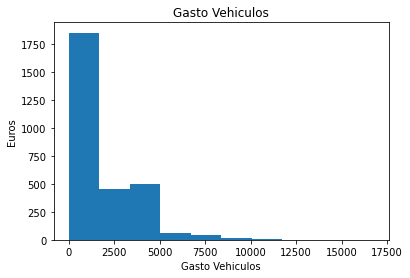

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(datos["Gasto_Vehiculos"], bins = 10, range = (datos["Gasto_Vehiculos"].min(), datos["Gasto_Vehiculos"].max()))
plt.title("Gasto Vehiculos")
plt.xlabel("Gasto Vehiculos")
plt.ylabel("Euros")
plt.show()

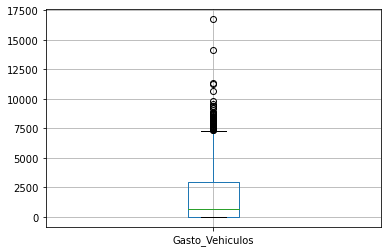

In [133]:
variables.boxplot(column="Gasto_Vehiculos")
plt.show()

También podemos obtener información de variables categóricas:

In [134]:
variables["Sexo"].unique()

array(['Mujer', 'Hombre'], dtype=object)

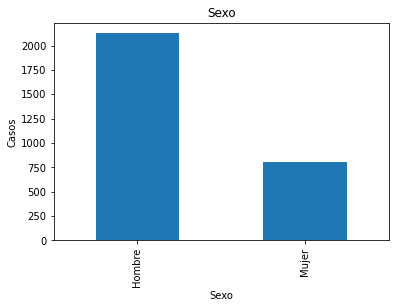

In [135]:
ax = variables["Sexo"].value_counts().plot(kind="bar")
plt.title("Sexo")
plt.xlabel("Sexo")
plt.ylabel("Casos")
plt.show()

<AxesSubplot:xlabel='Sexo'>

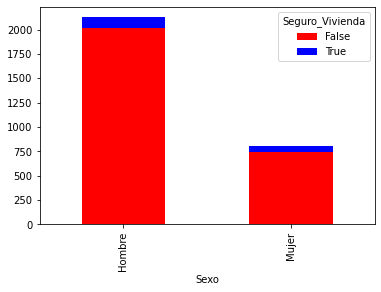

In [136]:
tmp = pd.crosstab([datos.Sexo], datos.Seguro_Vivienda)
tmp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [137]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2926
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_Cliente                           2927 non-null   object 
 1   Fecha_Nacimiento                     2927 non-null   object 
 2   Fecha_Alta                           2927 non-null   object 
 3   Sexo                                 2927 non-null   object 
 4   ID_Zona                              2927 non-null   object 
 5   Productos_Vida                       2927 non-null   int64  
 6   Productos_Vehiculos                  2927 non-null   int64  
 7   Productos_Otros                      2927 non-null   int64  
 8   Gasto_Vida                           2927 non-null   float64
 9   Gasto_Vehiculos                      2927 non-null   float64
 10  Gasto_Otros                          2927 non-null   float64
 11  Tipo_Familia                  

## Selección de variables

Hay diversos métodos que nos permiten identificar las mejores variables para resolver nuestro problema. Scikit permite identificar las mejores variables según diversos tests estadísticos, aunque para algunos de ellos debemos utilizar sólo las variables numéricas:

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(chi2, k=10).fit(variables._get_numeric_data(), targets)
for (col, sel) in zip(variables._get_numeric_data().columns.values, chi2.get_support()):
    if sel:
        print(col)
seleccion = chi2.transform(variables._get_numeric_data())

Gasto_Vida
Gasto_Vehiculos
Gasto_Otros
Educacion_Superior
Educacion_Baja
Poblacion_Empresario
Poblacion_Trabajador_No_Cualificado
Vivienda_Propiedad
Vivienda_Alquiler
Medico_Seguro_Privado


Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables:

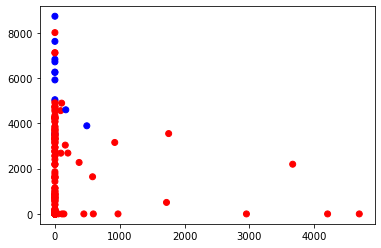

In [139]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(seleccion[1:200, 0], seleccion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Se puede ver cómo al representar las muestras respecto de estas dos variables, los casos de clientes que han contratado el producto se distinguen más fácilmente, ya que tienden a tener un valor alto en una de ellas (puntos azules). Por tanto, estas variables parecen ser buenas a la hora de distinguir casos positivos y negativos.

Cuando el proceso de modelización es costoso, reducir el número de variables puede ser de gran ayuda. Las técnicas de selección de variables se usan ampliamente en los procesos de análisis de datos y modelización.

## Transformación de variables

Es posible también realizar una transformación de variables, obteniendo combinaciones, normalmente lineales, de las variables originales que nos den mejores resultados al introducirlas en los modelos predictivos. SVD, PCA o ICA son algunos ejemplos:

In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(variables._get_numeric_data())
print(pca.components_)
print(pca.explained_variance_ratio_)
transformacion = pca.transform(variables._get_numeric_data())

[[ 1.13272484e-05  2.49947982e-04  7.73521138e-05  3.07643903e-03
   9.98926227e-01  4.61104027e-02  4.83515690e-04  9.64832896e-05
  -5.79992186e-04  4.74753804e-04 -3.82916687e-05 -4.36431988e-04
   7.76395166e-04 -1.67202699e-04 -4.09448513e-04 -1.99807434e-04
   1.92596102e-03 -1.92596102e-03  8.38968477e-04 -8.38968477e-04
   1.45851838e-06  1.21989814e-04 -1.23418552e-04]
 [ 2.29104271e-05  9.00357437e-05  4.87987707e-04  1.41580431e-02
  -4.61751332e-02  9.98791715e-01  5.98078053e-05  7.42107667e-04
  -8.02017454e-04 -3.99451289e-04  1.67935439e-04  2.31606373e-04
   1.51812400e-03 -1.35632862e-03 -8.08457612e-04  6.46470913e-04
   5.99488232e-03 -5.99488232e-03  1.36589999e-03 -1.36589999e-03
  -3.22428480e-05 -3.69649764e-05  6.92457105e-05]
 [ 5.40217286e-04 -2.46878994e-05  1.66385989e-04  9.99876166e-01
  -2.43492037e-03 -1.43238167e-02  2.16244726e-03 -2.04578733e-05
  -2.14247137e-03  4.83553780e-04  1.64118780e-03 -2.12421051e-03
   9.03270170e-04  5.64289594e-04 -6.954

Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables sintéticas:

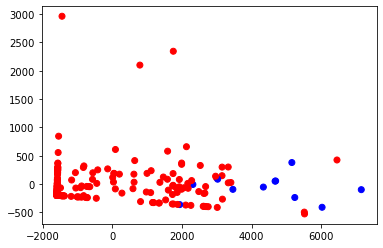

In [141]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion[1:200, 0], transformacion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Como en el caso anterior, se puede ver que los casos positivos se pueden separar más fácilmente de los negativos al quedar la mayoría de ellos a la derecha de la gráfica.

Es habitual que las variables sintéticas generadas con métodos como PCA sean incluso mejores que las mejores variables seleccionadas con otras técnicas. Como contrapartida, el cálculo de estas variables es costoso y suele ser difícil darles un sentido de negocio.

¿Podrías probar varias técnicas de selección y transformación de variables? Ten en cuenta que no sólo es importante lo buenas que sean las variables finales para la predicción, sino también que el coste de calcularlas sea razonable y que seas capaz de explicar y justificar estas variables en caso de que el cliente lo solicite.

* http://scikit-learn.org/stable/modules/feature_selection.html
* http://scikit-learn.org/stable/modules/decomposition.html

In [165]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import LinearSVC
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import NMF

## PRUEBA 1 : CONVERTIR VARIABLE GÉNERO A CATEGÓRICA Y CREAR NUEVAS COLUMNAS CON LOS AÑOS DE NACIMIENTO Y DE ALTA

# Pasar el género a categórica (one hot encoder) y crear una columna con el año de la fecha de nacimiento y de alta

# of_style = OneHotEncoder()
# of_results = of_style.fit_transform(variables[['Sexo']])
# variables = variables.join(pd.DataFrame(of_results.toarray(), columns=of_style.categories_))

# variables['Año_nacimiento'] = pd.to_datetime(variables['Fecha_Nacimiento']).dt.year
# variables['Año_alta'] = pd.to_datetime(variables['Fecha_Alta']).dt.year

## SE OBSERVÓ POSTERIORMENTE QUE EMPEORABA EL SCORE DEL MODELO (POR ESO ESTÁ COMENTADO EL CÓDIGO)

# PRUEBA 2 : Utilizar estimadores basados en árboles que desechen las variables que son irrelevantes

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(variables._get_numeric_data(), targets)
print("La importancia de cada variable es la siguiente ", clf.feature_importances_)  

model = SelectFromModel(clf, prefit=True)
variables_new = model.transform(variables._get_numeric_data())
print("El número de variables seleccionadas por el estimador (Tree Classifier) es:",variables_new.shape)  

# PRUEBA 3 : Utilizar máquinas de vectores de soporte para seleccionar las variables 
# Primero con L1 que no es el valor por defecto (se utiliza para datasets que son muy dipersos)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(variables._get_numeric_data(), targets)
model = SelectFromModel(lsvc, prefit=True)
variables_new_lsvc = model.transform(variables._get_numeric_data())
print("El número de variables seleccionadas por el estimador (SVC - L1) es:", variables_new_lsvc.shape)

# Después con L2 que es el valor de penalty por defecto 

lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(variables._get_numeric_data(), targets)
model = SelectFromModel(lsvc, prefit=True)
variables_new_lsvc = model.transform(variables._get_numeric_data())
print("El número de variables seleccionadas por el estimador (SVC - L2) es:", variables_new_lsvc.shape)

# PRUEBA 4: NMF (es como PCA pero no acepta valores negativos)

nmf = NMF(n_components=2, init='random', random_state=0)
transformacion = nmf.fit_transform(variables._get_numeric_data())
print(nmf.components_)

# raise NotImplementedError()

La importancia de cada variable es la siguiente  [0.01507522 0.07723365 0.0461078  0.0126359  0.31048348 0.06440769
 0.02767006 0.02914865 0.02659697 0.03588483 0.03116733 0.03152804
 0.02866468 0.03037348 0.02882715 0.02699734 0.02661921 0.02831296
 0.02977734 0.02888092 0.01304018 0.02515243 0.02541468]
El número de variables seleccionadas por el estimador (Tree Classifier) es: (2927, 4)
El número de variables seleccionadas por el estimador (SVC - L1) es: (2927, 16)
El número de variables seleccionadas por el estimador (SVC - L2) es: (2927, 3)
[[2.44025876e-03 3.38896719e-02 2.56491577e-02 9.45078079e-01
  1.06049390e+02 0.00000000e+00 1.14518957e+00 7.97970689e-01
  4.04584674e-01 3.68251260e-01 8.22283809e-01 1.15720352e+00
  5.44028938e-01 6.90522073e-01 5.04556845e-01 6.08624372e-01
  1.34235153e+00 1.00538578e+00 6.98535866e-01 1.64920144e+00
  3.44451197e-02 1.66016840e-01 2.14727679e+00]
 [6.56488414e-03 3.14885555e-02 1.20690636e-01 3.89540990e+00
  0.00000000e+00 1.75070158e

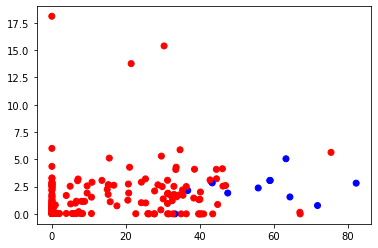

In [166]:
# Se representan las variables sintéticas como consecuencia de aplicar Non-Negative Matrix Factorization (NMF), donde 
# se obtienen dos matrices W Y H no negativas cuyo producto es la matriz no negativa variables.
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion[1:200, 0], transformacion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

*El primer paso es llevar a cabo una transformación de las variables no numéricas en categóricas, como el sexo ya que pueden ser relevantes para el problema.Para ello se utiliza el one hot encoder. Cuando se hizo se comprobó que la influencia de esa variable era mínima. También se aumentaron los features añadiendo el año de nacimiento y de alta, y, aunque la influencia era mayor, al hacer las pruebas después en el modelo los resultados era peores.*

*El siguiente paso es llevar a cabo técnicas de selección de variables como los árboles de decisión o las máquinas de vectores de soporte.Se observa que hay una gran diferencia en los modelos de máquinas de vectores si se utiliza como penalty L1 o L2. El valor L2 es el que hay por defecto y su resultado se parece bastante al del ExtraTreesClassifier donde determinan que las variables relevantes son 3-4. Sin embargo, cuando se utiliza L1 (que se usa cuando los datos del dataset son muy dispersos) se obtienen 17 variables relevantes. Posteriormente, se llevó a cabo la prueba en los modelos y se vio que con L1 funcionaban mucho mejor porque las variables más relevantes como el gasto de vida o de vehículo tienen valores muy dispersos, desde 0 hasta 7000, siendo uan gran mayoría 0*

*Finalmente se probó también una técnica de transformación de variables muy parecida a PCA (NMF). Como cabía esperar, la separación entre variables es casi idéntica a la de PCA pero siempre entre valores positivos. También es importante tener en cuenta que el coste computacional de PCA es mayor que el de otras técnicas como las basadas en máquinas de vectores de soporte.*

## Entrenamiento del modelo

No es evidente cuál es el mejor tipo de modelo para resolver nuestro problema. Por lo tanto, empezaremos con los modelos más sencillos y estables, los modelos lineales. Si los resultados no son suficientemente buenos, probaremos modelos más complejos.

Utilizaremos las variables originales, seleccionadas o transformadas y estudiaremos medidas de calidad como la precisión y el "recall" para evaluar cada uno de los modelos. Para ello, dividiremos el conjunto de datos de entrenamiento de modo que los primeros 2000 patrones servirán para entrenar los modelos, y el resto para validar:

In [19]:
variables.shape

(2927, 28)

In [39]:
import numpy as np

from sklearn.metrics import classification_report

X_train = variables._get_numeric_data()[1:2000]
X_val = variables._get_numeric_data()[2001:]
y_train = targets[1:2000]
y_val = targets[2001:]

El primer modelo a probar serán la regresión logística:

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logr = Pipeline([('std', StandardScaler()), ('lr', LogisticRegression())])
logr.fit(X_train, y_train)
print(classification_report(y_val, logr.predict(X_val)))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       870
        True       0.78      0.45      0.57        56

    accuracy                           0.96       926
   macro avg       0.87      0.72      0.77       926
weighted avg       0.95      0.96      0.95       926



Vemos que los modelos lineales tienden a clasificar los patrones de la clase minoritaria como pertenecientes a la clase mayoritaria, por lo que vamos a probar con modelos también sencillos pero no lineales, como árboles de decisión, con la esperanza de obtener mejores resultados:

In [22]:
from sklearn.tree import DecisionTreeClassifier

t = DecisionTreeClassifier()
t.fit(X_train, y_train)
print(classification_report(y_val, t.predict(X_val)))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       870
        True       0.66      0.71      0.68        56

    accuracy                           0.96       926
   macro avg       0.82      0.85      0.83       926
weighted avg       0.96      0.96      0.96       926



Elegir qué modelo utilizar y ajustarlo no es una tarea fácil. Habitualmente se prueban modelos sencillos y se va subiendo en complejidad si los resultados no son todo lo buenos que nos gustaría. La búsqueda de meta-parámetros es un proceso complejo que habitualmente necesita de cierta experiencia y conocimiento de los modelos.

Intenta mejorar los resultados vistos hasta ahora eligiendo alguno de los modelos e intentando ajustar sus meta-parámetros. Puedes probar a combinar técnicas de selección o transformación de variables con los modelos predictivos, con la ayuda de los pipelines de Scikit-learn.

* http://scikit-learn.org/stable/modules/linear_model.html
* http://scikit-learn.org/stable/modules/neural_network.html
* http://scikit-learn.org/stable/modules/tree.html
* http://scikit-learn.org/stable/modules/svm.html
* http://en.wikipedia.org/wiki/Precision_and_recall

In [221]:
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning

# Para utilizar el catboost hace falta pasar la variable objetivo a numérica (para el xgboost no era necesario pero lo va a ser)
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

# Se pasa la variable objetivo del test también a numérica
le = LabelEncoder()
le.fit(y_val)
y_val = le.transform(y_val)

# Se inicializan varios modelos
xgb_model = xgb.XGBClassifier(scale_pos_weight = 5) # Se ha observado que la relación de True/False es 5/100 por eso se añade ese parámetro
mlp_model = MLPClassifier(random_state=1, max_iter=2000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5, 2))
cbr_model = CatBoostClassifier(verbose = False)
gnb_model = GaussianNB()
ab_model  = AdaBoostClassifier(base_estimator=LinearSVC(), n_estimators=100, learning_rate=0.3, algorithm='SAMME')

# Se crean varias pipelines combinando los diferentes modelos y técnicas de selección y transformación de variables
pipe  = Pipeline([('std',StandardScaler()),('feature_selection', SelectFromModel(LinearSVC(penalty="l1", loss='squared_hinge',max_iter = 5000, dual = False))),('model',xgb_model)])
pipe2 = Pipeline([('std',StandardScaler()),('pca',PCA()),('model',xgb_model)])
pipe3 = Pipeline([('std',StandardScaler()),('pca',PCA()),('model',cbr_model)])
pipe4 = Pipeline([('std',StandardScaler()),('feature_selection', SelectFromModel(LinearSVC(penalty="l2",loss='squared_hinge',max_iter = 5000, dual = False))),('model',mlp_model)])
pipe5 = Pipeline([('std',StandardScaler()),('feature_selection', SelectFromModel(LinearSVC(penalty="l2",loss='squared_hinge',max_iter = 5000, dual = False))),('model',reg_model)])
pipe6 = Pipeline([('std',StandardScaler()),('feature_selection',PCA ()),('model',gnb_model)])
pipe7 = Pipeline([('std',StandardScaler()),('feature_selection',PCA ()),('model',ab_model)])

# Se entrenan todos los modelos y se saca su score
pipe.fit(X_train,y_train)
print("El score del modelo 1 (Linear SVC + XGBoost) es :", pipe.score(X_val,y_val))

pipe2.fit(X_train,y_train)
print("El score del modelo 2 (PCA + XGBoost) es :", pipe2.score(X_val,y_val))

pipe3.fit(X_train,y_train)
print("El score del modelo 3 (PCA + CatBoost) es:" ,pipe3.score(X_val,y_val))

pipe4.fit(X_train,y_train)
print("El score del modelo 4 (Linear SVC + MLP) es:" , pipe4.score(X_val,y_val))

pipe5.fit(X_train,y_train)
print("El score del modelo 5 (Linear SVC + LGBM) es:" , pipe5.score(X_val,y_val))

pipe6.fit(X_train,y_train)
print("El score del modelo 6 (PCA + Gaussian Naive Bayes) es:" , pipe6.score(X_val,y_val))

pipe7.fit(X_train,y_train)
print("El score del modelo 7 (PCA + Ensemble (AdaBoost)) es:" , pipe7.score(X_val,y_val))

# YOUR CODE HERE
#raise NotImplementedError()

El score del modelo 1 (Linear SVC + XGBoost) es : 0.9697624190064795
El score del modelo 2 (PCA + XGBoost) es : 0.9535637149028078
El score del modelo 3 (PCA + CatBoost) es: 0.9524838012958964
El score del modelo 4 (Linear SVC + MLP) es: 0.968682505399568
El score del modelo 5 (Linear SVC + LGBM) es: 0.6169736852251286
El score del modelo 6 (PCA + Gaussian Naive Bayes) es: 0.9460043196544277
El score del modelo 7 (PCA + Ensemble (AdaBoost)) es: 0.9524838012958964


In [222]:
# También se prueba con una LSTM y el wrapper de keras y scikit learn
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def create_nn():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(23,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
    return model

nn = KerasClassifier(build_fn=create_nn, epochs=100)
nn.fit(X_train,y_train)
preds_nn = nn.predict(X_val)
score_nn_train = nn.score(X_train,y_train)
score_nn = nn.score(X_val, y_val)

print(f"Accuracy\nnn: {score_nn_train} {score_nn}")

Epoch 1/100
63/63 [==============================] - 1s 3ms/step - loss: 82.9879 - accuracy: 0.9069
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 49.4583 - accuracy: 0.9061
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 21.6435 - accuracy: 0.9235
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 16.0660 - accuracy: 0.8842
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 7.0574 - accuracy: 0.8925
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 5.2887 - accuracy: 0.8735
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 4.5326 - accuracy: 0.8818
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 2.7684 - accuracy: 0.9100
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 2.3888 - accuracy: 0.9085
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 2.3858 - accuracy: 0.9220
Epoch

63/63 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9427
Epoch 83/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9444
Epoch 84/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1773 - accuracy: 0.9396
Epoch 85/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9463
Epoch 86/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9524
Epoch 87/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1660 - accuracy: 0.9451
Epoch 88/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9496
Epoch 89/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9521
Epoch 90/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9489
Epoch 91/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1831 - accuracy: 0.9372
Epoch 92/100


C:\Users\jimen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


29/29 [==============================] - 0s 712us/step - loss: 0.2207 - accuracy: 0.9395
Accuracy
nn: 0.9454727172851562 0.9395248293876648


*Se oberva que los modelos que dan mejores resultados son el 1 y el 4 por lo que se va a realizar la búsqueda de metaparámetros en ellos (con el 1 a través del Grid Search y con el 4 con el Bayes Search)*

In [203]:
# Con los dos mejores modelos se realiza la búsqueda de metaparámetros
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
    'feature_selection__estimator__max_iter' : [10000,15000]
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid.fit(variables._get_numeric_data(),targets)
print(grid.best_params_)
mean_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print(mean_score)

{'feature_selection__estimator__max_iter': 10000, 'model__max_depth': 2, 'model__n_estimators': 100}
0.9598179689814252


In [223]:
from skopt import BayesSearchCV
from skopt.space import Real
estimator = Pipeline([('std', StandardScaler()),('feature_selection',SelectFromModel(LinearSVC(penalty="l2",loss='squared_hinge',max_iter = 5000, dual = True))),
                      ('mlp', MLPClassifier(max_iter=2000, hidden_layer_sizes=(10, 5, 2)))])
predictor = BayesSearchCV(estimator, {'mlp__alpha': Real(0.001, 0.1),
                          'mlp__solver': ['lbfgs','adam', 'sgd']}, n_iter = 15)
predictor.fit(X_train,y_train)
print(predictor.score(X_val, y_val))

0.9395248380129589


## Evaluación del modelo

Ya vimos en el apartado anterior algunos indicadores de la calidad del modelo. También podemos utilizar gráficas como la curva precisión-recall o la curva ROC:

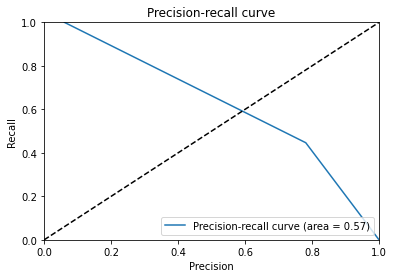

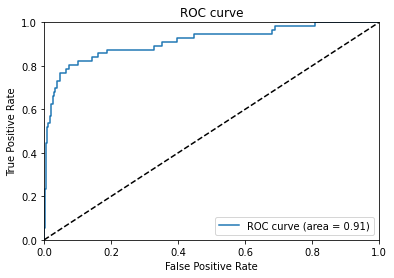

In [163]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_val, logr.predict(X_val))
pr_auc = auc(precision, recall)
plt.figure()
plt.plot(precision, recall, label='Precision-recall curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, logr.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Es muy habitual utilizar estas gráficas, especialmente la curva ROC, para decidir si los resultados son satisfactorios. Cuanto mayor sea el área que queda bajo la curva, mejores son los resultados del modelo que estamos probando.

Utiliza gráficas (estas u otras que puedas encontrar útiles) para hacer una valoración final de los resultados. Razona las conclusiones.

* http://scikit-learn.org/stable/modules/model_evaluation.html
* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

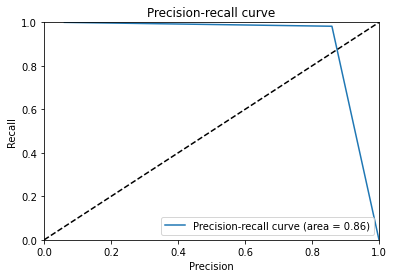

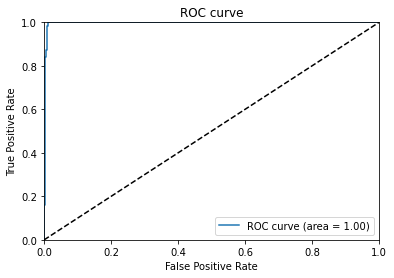

Precision: 85.94%
Recall: 98.21%
F1 Score: 91.67%
Accuracy: 98.92%


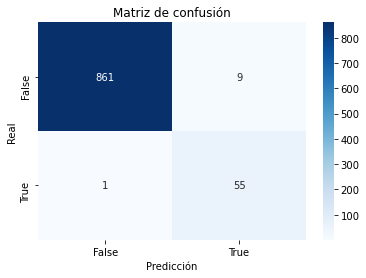

In [204]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

precision, recall, thresholds = precision_recall_curve(y_val, grid.predict(X_val))
pr_auc = auc(precision, recall)
plt.figure()
plt.plot(precision, recall, label='Precision-recall curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, grid.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Se obtienen las diferentes métricas del problema (accuracy, precision y recall)

cf_matrix =confusion_matrix(y_val,grid.predict(X_val))
tn, fp, fn, tp = confusion_matrix(y_val, grid.predict(X_val)).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(y_val, grid.predict(X_val))))
print("Recall: {:.2f}%".format(100 * recall_score(y_val, grid.predict(X_val))))
print("F1 Score: {:.2f}%".format(100 * f1_score(y_val,grid.predict(X_val))))
print("Accuracy: {:.2f}%".format(100 * accuracy_score(y_val,grid.predict(X_val))))

import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
ax.set_xlabel('Predicción');
ax.set_ylabel('Real');
ax.set_title('Matriz de confusión');
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);
# YOUR CODE HERE
#raise NotImplementedError()

In [233]:
df_test = pd.read_csv("Clientes_test.csv", sep = "\t")

In [234]:
df_test

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros
0,C2172,05/10/1981,04/02/2005,Hombre,Z0403,1,2,2,735.14,2535.49,337.77
1,C1627,21/09/1983,27/12/2004,Mujer,Z0700,0,1,1,0.00,3195.94,87.96
2,C0649,24/01/1945,02/12/1967,Hombre,Z1023,0,0,0,0.00,0.00,0.00
3,C0712,11/07/1945,15/10/1966,Hombre,Z0648,0,1,0,0.00,3183.59,0.00
4,C0648,09/02/1964,11/09/1988,Hombre,Z0955,0,1,2,0.00,3613.07,238.26
...,...,...,...,...,...,...,...,...,...,...,...
888,C2417,20/08/1952,01/02/1974,Hombre,Z0815,0,1,0,0.00,4264.50,0.00
889,C2279,21/11/1983,10/03/2008,Hombre,Z1506,0,0,2,0.00,0.00,559.94
890,C3365,23/06/1981,31/03/2002,Hombre,Z0860,0,0,0,0.00,0.00,0.00
891,C0237,26/11/1958,25/01/1981,Hombre,Z0318,0,1,0,0.00,2036.26,0.00


In [208]:
datos = pd.merge(df_test, zonas, on="ID_Zona", how="inner")
X_test = datos._get_numeric_data()
y_predicciones = grid.predict(X_test) 

In [230]:
(pd.Series(y_predicciones)).value_counts()

False    827
True      58
dtype: int64

*Sale muy similar a la proporción en el dataset de entrenamiento*

In [215]:
datos['predicciones'] = y_predicciones

In [226]:
#(pd.Series(y_predicciones)).to_csv("predicciones.csv",encoding = 'utf-8-sig')

In [219]:
#datos.to_csv("test+predicciones.csv",encoding = 'utf-8-sig')